# 1. Introduction and System Requirements

## 1.1 Problem Statement

The biology research team faces a complex image classification challenge requiring automated identification of cell types from microscopy images. This represents a fundamental systems challenge with the following characteristics:

- **Dataset**: Thousands of microscopy images
- **Labels**: Partially labeled dataset (semi-supervised learning scenario)
- **Domain complexity**: Cell morphology varies significantly within and between cell types
- **Computational resources**: Access to HPC cluster with GPUs
- **User expertise**: Strong domain knowledge in biology, limited programming experience

Deep learning approaches are particularly well-suited for microscopy image classification because they can:
1. Learn hierarchical features directly from raw image data
2. Capture complex morphological patterns difficult to define manually
3. Achieve state-of-the-art performance on similar biomedical imaging tasks
4. Leverage transfer learning to address partially labeled data challenges

The system design must address not only the technical aspects of implementing deep learning models but also create an accessible framework that empowers domain experts to leverage their biological knowledge throughout the development process.

Below is a visualization of the proposed workflow connecting microscopy imaging to automated cell classification:

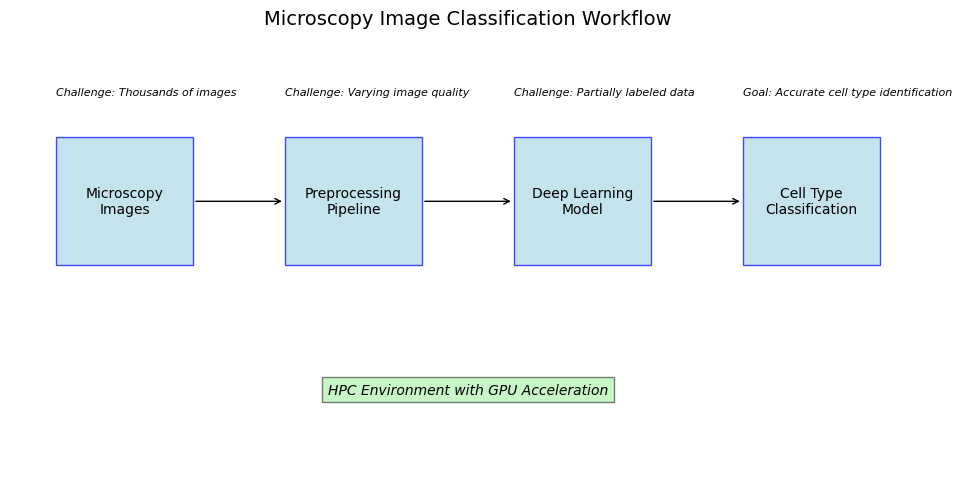

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# setup the figure
fig, ax = plt.subplots(figsize=(10, 5))

# component boxes with positions
components = [
    {"name": "Microscopy\nImages", "position": [0.05, 0.5, 0.15, 0.3]},
    {"name": "Preprocessing\nPipeline", "position": [0.3, 0.5, 0.15, 0.3]},
    {"name": "Deep Learning\nModel", "position": [0.55, 0.5, 0.15, 0.3]},
    {"name": "Cell Type\nClassification", "position": [0.8, 0.5, 0.15, 0.3]}
]

# draw the boxes
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='lightblue', alpha=0.7)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=10)

# connect with arrows
arrows = [
    {"start": [0.2, 0.65], "end": [0.3, 0.65]},  # first arrow
    {"start": [0.45, 0.65], "end": [0.55, 0.65]},  # middle arrow
    {"start": [0.7, 0.65], "end": [0.8, 0.65]},  # last arow
]

# draw arrows
for arrow in arrows:
    ax.annotate(
        '', xy=arrow["end"], xytext=arrow["start"],
        arrowprops=dict(arrowstyle='->', color='black')
    )

# add challenge notes
plt.text(0.05, 0.9, "Challenge: Thousands of images", fontsize=8, style='italic')
plt.text(0.3, 0.9, "Challenge: Varying image quality", fontsize=8, style='italic')
plt.text(0.55, 0.9, "Challenge: Partially labeled data", fontsize=8, style='italic')
plt.text(0.8, 0.9, "Goal: Accurate cell type identification", fontsize=8, style='italic')

# add hpc label at bottom
plt.text(0.5, 0.2, "HPC Environment with GPU Acceleration", fontsize=10, 
         style='italic', bbox=dict(facecolor='lightgreen', alpha=0.5), ha='center')

# cleanup
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# title
plt.title('Microscopy Image Classification Workflow', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

## 1.2 Requirements Analysis

### Functional Requirements
- Process microscopy images for cell type classification
- Accommodate partially labeled dataset in the learning approach
- Provide an intuitive interface that bridges biology expertise with deep learning capabilities
- Enable researchers to translate their domain knowledge into model development
- Support the classification of various cell types from microscopy images

### Performance Considerations
- Classification accuracy suitable for research-grade analysis
- Processing efficiency utilizing available HPC resources
- Scalability to handle the thousands of available images
- Effective utilization of GPU resources for model training and inference

### Researcher Experience Considerations
- Domain-centered interface that speaks the language of biology research
- Tools that empower biologists to directly apply their specialized knowledge
- Knowledge transfer mechanisms aligned with research methodologies
- Seamless integration into existing microscopy research workflows

### Integration Considerations
- Compatibility with the available HPC cluster environment
- Effective utilization of GPU resources
- Data management appropriate for the image dataset scale
- Support for reproducible research practices
- Appropriate version control for models and experiments

## 1.3 System Constraints and Considerations

### Technical Constraints
- **Partially Labeled Dataset**: The system must work with the mix of labeled and unlabeled microscopy images
- **HPC and GPU Resources**: Design must effectively utilize the available HPC cluster with GPUs
- **Image Volume**: System needs to efficiently process thousands of microscopy images
- **Computational Requirements**: Deep learning for image classification typically requires significant computational resources

### Design Considerations for Accessibility
- **Domain-Appropriate Interface**: Create interfaces that prioritize biological concepts over technical implementation
- **Technical Abstraction**: Abstract complex programming concepts while maintaining system capabilities
- **Intuitive Workflows**: Design processes that align with biological research methodologies
- **Balanced Autonomy**: Allow researchers to focus on biological analysis while automating technical aspects

### Reproducibility Considerations
- **Consistent Results**: Ensure classification outcomes are reproducible across multiple runs
- **Parameter Tracking**: Record model configurations and processing steps
- **Environment Management**: Account for dependencies and configurations in the HPC environment
- **Experiment History**: Maintain records of different approaches and their outcomes

### Research Workflow Considerations
- **Integration with Existing Processes**: Consider how the system fits into current microscopy research activities
- **Data Management**: Address the handling of thousands of images through the classification pipeline
- **Result Interpretation**: Provide ways for biologists to understand and interpret model outputs
- **Knowledge Application**: Enable researchers to apply their domain expertise to improve classifications

# 2. Image Processing Architecture

## 2.1 Data Organization Framework

The architecture requires a structured organization framework to efficiently manage thousands of microscopy images while distinguishing between labeled and unlabeled data. This organization lays the foundation for subsequent processing and model development.

### Core Organization Principles

- **Separation of Concerns**: Maintain clear distinction between raw images, processed images, and derived features
- **Labeled/Unlabeled Distinction**: Organize data to facilitate both supervised and semi-supervised learning approaches
- **Metadata Association**: Connect images with relevant experimental context and cell type labels
- **Versioning Support**: Enable tracking of image processing iterations and experimental variants
- **Scalability**: Accommodate growth from thousands to potentially tens of thousands of images

### Proposed Organizational Structure

The organization framework follows a hierarchical approach with progressive refinement:

1. **Source Image Repository**: Original microscopy images preserved in unmodified form
2. **Processing Staging Area**: Working space for preprocessing operations
3. **Feature Repository**: Extracted features and representations for model development
4. **Model Training Sets**: Curated collections of processed images for specific experiments
5. **Results Archive**: Classification outputs with associated model metadata

This structure enables researchers to maintain data provenance while facilitating efficient access patterns for the HPC environment.

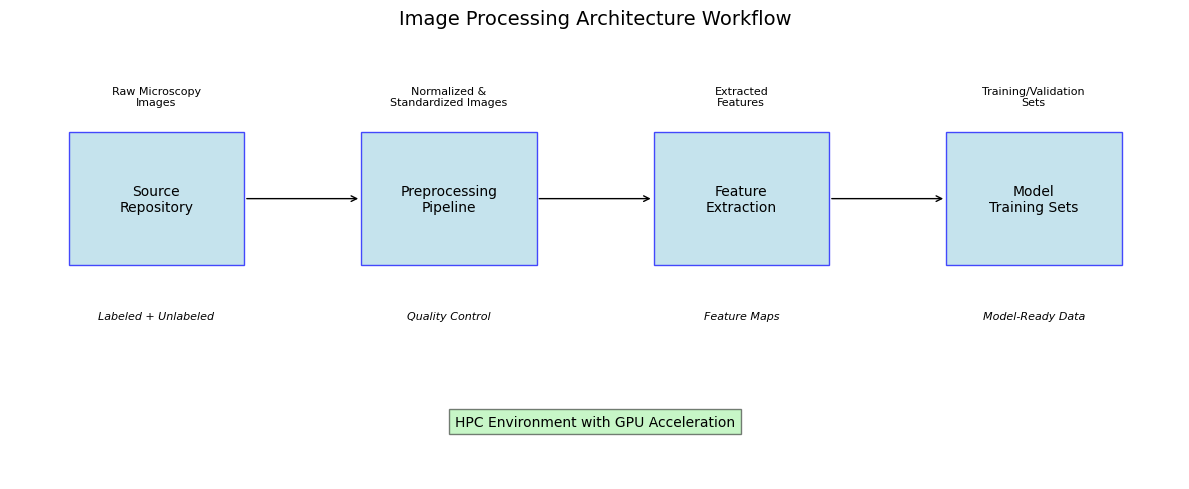

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# setup figure
fig, ax = plt.subplots(figsize=(12, 5))

# main process boxes
components = [
    {"name": "Source\nRepository", "position": [0.05, 0.4, 0.15, 0.25], "color": "lightblue"},
    {"name": "Preprocessing\nPipeline", "position": [0.3, 0.4, 0.15, 0.25], "color": "lightblue"},
    {"name": "Feature\nExtraction", "position": [0.55, 0.4, 0.15, 0.25], "color": "lightblue"},
    {"name": "Model\nTraining Sets", "position": [0.8, 0.4, 0.15, 0.25], "color": "lightblue"}
]

# draw the boxes
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', 
                            facecolor=comp["color"], alpha=0.7)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=10)

# connect with arrows
arrows = [
    {"start": [0.2, 0.525], "end": [0.3, 0.525]},
    {"start": [0.45, 0.525], "end": [0.55, 0.525]},
    {"start": [0.7, 0.525], "end": [0.8, 0.525]},
]

# draw arrows
for arrow in arrows:
    ax.annotate('', xy=arrow["end"], xytext=arrow["start"],
                arrowprops=dict(arrowstyle='->', color='black'))

# Calculate center positions based on component boxes
for i, comp in enumerate(components):
    x, y, w, h = comp["position"]
    center_x = x + w/2
    
    # add data labels above - aligned with center of each box
    if i == 0:
        ax.text(center_x, 0.7, "Raw Microscopy\nImages", fontsize=8, ha='center')
    elif i == 1:
        ax.text(center_x, 0.7, "Normalized &\nStandardized Images", fontsize=8, ha='center')
    elif i == 2:
        ax.text(center_x, 0.7, "Extracted\nFeatures", fontsize=8, ha='center')
    else:
        ax.text(center_x, 0.7, "Training/Validation\nSets", fontsize=8, ha='center')
    
    # add data flow labels below - aligned with center of each box
    if i == 0:
        ax.text(center_x, 0.3, "Labeled + Unlabeled", fontsize=8, ha='center', style='italic')
    elif i == 1:
        ax.text(center_x, 0.3, "Quality Control", fontsize=8, ha='center', style='italic')
    elif i == 2:
        ax.text(center_x, 0.3, "Feature Maps", fontsize=8, ha='center', style='italic')
    else:
        ax.text(center_x, 0.3, "Model-Ready Data", fontsize=8, ha='center', style='italic')

# add hpc environment indication
plt.text(0.5, 0.1, "HPC Environment with GPU Acceleration", fontsize=10, 
         bbox=dict(facecolor='lightgreen', alpha=0.5), ha='center')

# cleanup
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.8)
ax.axis('off')
plt.title('Image Processing Architecture Workflow', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## 2.2 Preprocessing Pipeline Design

The preprocessing pipeline transforms raw microscopy images into standardized inputs suitable for deep learning models. For microscopy data, preprocessing is particularly important due to variations in imaging conditions, magnification, staining, and acquisition parameters.

### Pipeline Components

- **Quality Assessment**: Automated detection of common microscopy artifacts, blur, or contamination
- **Normalization**: Standardizing pixel intensity distributions to account for lighting and exposure variations
- **Registration**: Aligning images to consistent orientations and positions
- **Segmentation**: Isolating regions of interest such as individual cells from background
- **Augmentation**: Generating additional training examples through controlled variations

### Computational Considerations

The preprocessing pipeline must balance computational efficiency with quality:

- **Batch Processing**: Design pipeline to process groups of images in parallel on HPC resources
- **GPU Acceleration**: Utilize GPU capabilities for compute-intensive operations like segmentation
- **Caching Strategy**: Implement intermediate result storage to avoid redundant computation
- **Scalable Workflow**: Enable processing of image subsets during development and full dataset in production

### Accessibility Approach

Making preprocessing accessible to researchers with domain knowledge:

- **Parameter Presets**: Provide validated settings for common microscopy image types
- **Visual Feedback**: Incorporate visualization of preprocessing effects for quality assessment
- **Interactive Refinement**: Enable adjustment of preprocessing parameters with real-time feedback
- **Configurable Workflows**: Allow researchers to include or exclude preprocessing steps based on their data characteristics

## 2.3 Feature Extraction Strategy

Feature extraction transforms preprocessed images into representations that capture relevant cellular characteristics for classification. Effective feature extraction is critical for microscopy image analysis, where subtle morphological differences often determine cell type.

### Deep Learning Approaches

- **Convolutional Neural Networks**: Leverage hierarchical feature learning for automatic extraction of relevant visual patterns
- **Transfer Learning**: Utilize pre-trained networks to extract general image features, reducing computational requirements and training data needs
- **Self-Supervised Learning**: Extract features from unlabeled images by learning to solve pretext tasks

### Domain Knowledge Integration

- **Attention Mechanisms**: Direct the model to focus on biologically relevant regions
- **Guided Feature Emphasis**: Incorporate domain knowledge to prioritize cell-specific characteristics
- **Feature Validation**: Provide visualization tools for biologists to inspect extracted features for biological relevance

### Computational Optimization

- **Progressive Resolution**: Process images at multiple scales to balance detail and computation
- **Dimensionality Reduction**: Apply techniques to focus on most discriminative features
- **Distributed Processing**: Parallelize feature extraction across HPC nodes for efficiency

### Hybrid Extraction Framework

A hybrid approach combines automatic feature extraction with domain expertise:

1. **Base Feature Extraction**: Apply deep learning for initial feature identification
2. **Domain Feedback Loop**: Allow researchers to review and guide feature importance
3. **Iterative Refinement**: Adjust feature extraction based on biological insights
4. **Explainable Outputs**: Generate visualizations of extracted features in biologically meaningful terms